In [1]:
# Callin Switzer
# 23 May 2017
# Get all node values from a trained network, given a set of weights

In [2]:
import numpy as np
import pickle
import os
import pandas as pd

In [22]:
# this function returns values of all layers
def returnLayerValues(weights, inputData):
    '''
    Returns all layer values from fitted network (including input and output)
    
    The fitted network uses "tanh" activation for hidden layers and
        "linear" activation for the final layer
        
    Params:
        weights (list): list of weights from a fitted model
        inputData (array or Data frame): input data that will be run through the network
    
    Returns:
        layer values (list): values of all of the units in the network.
            - the 0'th item in the list is the input data
            - the final item in the list is the final prediction
    '''
    
    LayerValues = [inputData.astype("float64")]
    for layerNum in np.arange(0, len(weights), 2):
        
        # calculate dot product and add bias
        nextLayer = np.dot(LayerValues[-1], weights[layerNum]) + weights[layerNum+1]
        
        if layerNum != (len(weights)-2):
            # apply activation function, except for final layer
            nextLayer = np.tanh(nextLayer)
        
        # append to list
        LayerValues.append(nextLayer)
        
    return(LayerValues)

In [23]:
# load example data
pathToTrainingX= r"C:\Users\Theodore\Dropbox\ExampleData\X_train_small.csv"
x_train = pd.read_csv(pathToTrainingX)

# in case you want to compare predicted to actual, you can load the Y dataset
pathToTrainingY= r"C:\Users\Theodore\Dropbox\ExampleData\Y_train_small.csv"
y_train = pd.read_csv(pathToTrainingY)

In [24]:
# load weights
pathToWeights = r"C:\Users\Theodore\Dropbox\ExampleData\Opt_rmsprop__Dro_0.0__Num_20_20_16__Wei_0_pruned_wts.pkl"

# read in weight data
wts =  pickle.load(open(pathToWeights, 'rb'))

# print sizes of each weight matrix
wtLengths = []
for ii in range(len(wts)):
    print(wts[ii].shape)
    wtLengths.append(np.prod(wts[ii].shape))

# print total number of weights (including biases)
print(np.sum(wtLengths), "total weights")

(10, 20)
(20,)
(20, 20)
(20,)
(20, 16)
(16,)
(16, 7)
(7,)
1095 total weights


In [82]:
# Specify upper limit for maximal layer size
MaxSize = 100

In [25]:
# calculate values at each layer, using the function above
intermediateValues = returnLayerValues(wts, inputData= x_train)
len(intermediateValues)

5

In [26]:
# calculate intermediate values for only one input row
intermediateValues = returnLayerValues(wts, inputData= x_train.iloc[10, :])
intermediateValues

[phi_0          0.041542
 theta_0        0.054877
 x_99          -0.152803
 y_99           0.285903
 phi_99         0.239964
 theta_99       0.240972
 x_dot_0       -0.112056
 y_dot_0        0.359979
 phi_dot_0      0.050783
 theta_dot_0    0.136457
 Name: 10, dtype: float64,
 array([-0.13556157,  0.03295296,  0.06441126,  0.19215864,  0.01631493,
         0.2854097 , -0.19370388,  0.14608274,  0.05551645, -0.33661555,
         0.00265089,  0.16413905,  0.01613132, -0.07589644,  0.18447672,
         0.28813172, -0.03105188,  0.1496494 , -0.0589839 ,  0.15664024]),
 array([ 0.64418939, -0.31667975,  0.22383183,  0.25154968, -0.31221573,
         0.09311975, -0.12242253, -0.12680727,  0.53562416,  0.17442809,
         0.23693062, -0.05197936, -0.0512231 ,  0.01744712, -0.23281864,
         0.53774949,  0.11636556,  0.19190495,  0.04639692, -0.25954867]),
 array([ 0.64372407, -0.58434746,  0.36832682, -0.84890526, -0.6083784 ,
         0.18469928,  0.3070044 , -0.32664111, -0.28786099,  0

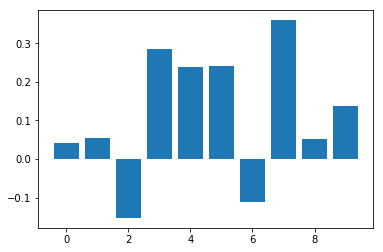

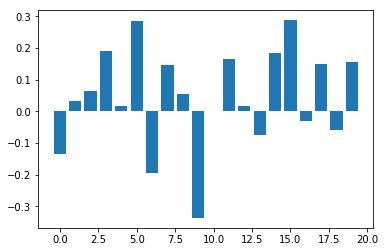

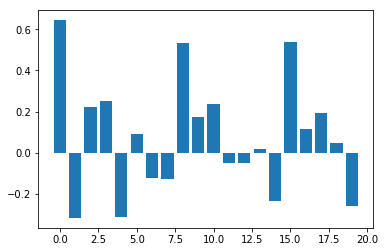

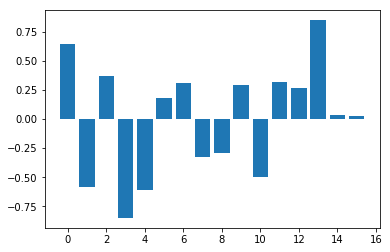

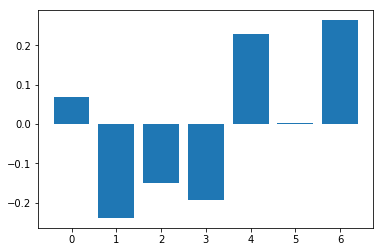

In [27]:
import matplotlib.pyplot as plt
for l in intermediateValues:
    plt.figure()
    plt.bar(range(len(l)), l)

# Create Weights DataFrame

In [146]:
import pandas as pd

nodes = []
links = []
# iterate through the layers to get links and nodes
for layerNum in np.arange(0, len(wts), 2):
    m, n = wts[layerNum].shape
    for i in range(m):
        node_id = int(layerNum/2*MaxSize + i)
        nodes.append({'id':node_id, 'LayerNum':int(layerNum/2), 'NodeNum':i})
        for j in range(n):
            source = node_id
            target = int((layerNum/2+1)*MaxSize + j)
            links.append({'source':source, 'target':target, 'weight':float(wts[layerNum][i,j])})
# output layer nodes
for l in range(len(wts[-1])):
    node_id = int(len(wts)/2*MaxSize + l)
    nodes.append({'id':node_id, 'LayerNum':int(len(wts)/2), 'NodeNum':i})
# Build the network graph
Graph = {'nodes': nodes, 'links': links}
with open('NetworkGraph.json', 'w') as fp:
    json.dump(Graph, fp)                      

In [145]:
dic = {'nodes': [{'s': 1, 'a': 0.3971908310480}, {'s': 2, 'a': 0}], 'links': [{'l': 1, 'r': 7}, {'l': 2, 'r': 4}]}
dic

{'links': [{'l': 1, 'r': 7}, {'l': 2, 'r': 4}],
 'nodes': [{'a': 0.397190831048, 's': 1}, {'a': 0, 's': 2}]}

In [135]:
with open('dic.json', 'w') as fp:
    json.dump(dic, fp)